In [1]:
# imports needed
import gensim 
import pandas as pd
import numpy as np
import random
import unidecode
import re
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize.regexp import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
from  nltk.stem.snowball import FrenchStemmer, EnglishStemmer
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from help_dicrah_functions import *
from __future__ import division
from sklearn.decomposition import PCA, RandomizedPCA



import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Note: all the functions that we wrote are in help_dicrah_functions.py 

# Loading and cleaning tweets

#### 1 load and clean tweets for w2v

In [2]:
filename='/Users/Michi/Google Drive/formation_data_science/twitter_project/help_dicrah/machine_learning/tweets_dilcrah_60k.csv'
#Streams/stream_#Web2day OR #aidessociales.jsonl'
#Users/help_dicrah_large_random_sample.jsonl'

def read_json_files(path_to_file):
    with open(path_to_file) as p:
        data = pd.read_json(p, lines=True)
    return data

#df = read_json_files(filename)
df = pd.read_csv(filename, header=None,
                 names=['tweet'], index_col=None)#.drop_duplicates(subset='id')

df.head()

,tweet
997565477458243584,@AngeFreddy Pouloulouuuu
957325640465862656,@R0eil Nan😂
1006280333573181441,@Coldmindxd LAQUELLE.
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔"
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...


In [3]:
#print(df.tweet[np.random.randint(0,df.shape[0])])
#df = df[['id','full_text']].drop_duplicates(subset='id')
df.head()
print(df.tweet[58])
df.shape

,tweet
997565477458243584,@AngeFreddy Pouloulouuuu
957325640465862656,@R0eil Nan😂
1006280333573181441,@Coldmindxd LAQUELLE.
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔"
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...


@americanflagusa @Philome17321717 Grace au grand Mufti fossoyeur de la Françe https://t.co/vZbOcJ1zwo


(47199, 1)

In [5]:
text=df.tweet[np.random.randint(1,df.shape[0])]
print(text)
tweet_cleaner(text, my_dict)


tokenize(\
    tweet_cleaner(text, my_dict))

En toda la mañana no llovió ah pero nosotras salimos de la Universidad y se larga con todo 😩


u'en toda la manana no llovio ah pero nosotras salimos de la universidad y se larga con todo'

[u'en',
 u'toda',
 u'la',
 u'manana',
 u'no',
 u'llovio',
 u'ah',
 u'pero',
 u'nosotras',
 u'salimos',
 u'de',
 u'la',
 u'universidad',
 u'y',
 u'se',
 u'larga',
 u'con',
 u'todo']

In [6]:
#clean_tweets = [tweet_cleaner(str(tweet), my_dict) for tweet in list(df['full_text'])]

df['clean_tweets'] = df.tweet.apply( \
                                    lambda x:' '.join(\
                                                      tokenize(\
                                                                tweet_cleaner(x, my_dict))))

#df['clean_tweets'] = clean_tweets
df.shape
df.head(5)

(47199, 2)

,tweet,clean_tweets
997565477458243584,@AngeFreddy Pouloulouuuu,pouloulouuuu
957325640465862656,@R0eil Nan😂,nan
1006280333573181441,@Coldmindxd LAQUELLE.,laquelle
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔",je me dis que dans ans j ai ans
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...,le mieux qu ils puissent faire


In [7]:
df = df.drop_duplicates(subset='clean_tweets')
df.shape

(37921, 2)

In [8]:
df['nc'] = [len(t) for t in df.clean_tweets]
df['n_word'] = df['clean_tweets'].apply(lambda x: len(x.split(' ')))
df = df.drop(df[df.nc <= 3].index).drop('nc', axis=1)
df = df.drop(df[df.n_word <= 3].index).drop('n_word', axis=1)
df.head(10)
df.shape

,tweet,clean_tweets
834864840359473157,"Je me dis que dans 20 ans, j'ai 40 ans 🤔🤔",je me dis que dans ans j ai ans
1005911475934912522,Le mieux qu’ils puissent faire ... https://t.c...,le mieux qu ils puissent faire
998272896748400640,@sarahjandau J’avoue ! 😂😂😂 (al’batard),j avoue al batard
1006625574201290752,@TweetMen2 J’ai perdu à la question avec la qu...,j ai perdu a la question avec la question sur ...
1004808648705572864,Mais mdrrrrr le gars il connaît plus que sa pe...,mais mdrrrrr le gars il connait plus que sa pe...
1006616033090818048,@tissysmlc C’est l’amour fou là hein,c est l amour fou la hein
1006228696586481672,Ça vous est déjà arrivé un iPhone qui se met à...,ca vous est deja arrive un iphone qui se met a...
1006474887643348994,@oxomendez Ptdr jsp du tout,ptdr jsp du tout
1004957223901114368,"Recette de #tarte de mousse au #chocolat, #san...",recette de tarte de mousse au chocolat sanscui...
988163903103356928,@Alexia_Blr @m3llle L'endurance c'est mon poin...,l endurance c est mon point faible


(32580, 2)

#### 2 load and clean tweets for ML

In [ ]:
#tweet_file = '/Users/Michi/Google Drive/formation_data_science/twitter_project/help_dicrah/machine_learning/tweets_labeled_4k_all.xlsx'

#tw_data = pd.read_excel(tweet_file, names=['Label', 'ID', 'Texte'])

#tw_data.head(5)

In [9]:
#tw_data_train = pd.read_csv('tw_data_train.csv')
#tw_data_test = pd.read_csv('tw_data_test.csv')
#print(tw_data_train.shape)
#print(tw_data_test.shape)
#ind_train_last = tw_data_train.shape[0]-1

tw_data = pd.read_csv('tw_data_labeled_4k.csv')
#tw_data = pd.concat([tw_data_train, tw_data_test])




In [10]:
tw_data['Texte_clean'] = tw_data.Texte.apply(lambda x:' '.join(tokenize(tweet_cleaner(x, my_dict))))

print(tw_data.shape)

(3615, 4)


In [11]:
tw_data.Label.value_counts()
tw_data.head(5)

N     3066
H      542
SH       7
Name: Label, dtype: int64

,ID,Label,Texte,Texte_clean
0,998206424189751296,N,On m’avait sorti (pour de vrai) « on est tous ...,on m avait sorti pour de vrai on est tous egau...
1,997896508384169984,N,VIVE L AMOUR ❤VIVE LA PAIX\n❤❤❤❤❤❤❤❤❤❤❤❤👏👍\n...,vive l amour vive la paix entre les peuples du...
2,31,H,J'me rend compte à quel point ya trop d'noir d...,j me rend compte a quel point ya trop d noir d...
3,998519485467414529,H,@KrypsKarmaKid Tu traites qui de salope la seu...,tu traites qui de salope la seule salope je co...
4,997799245464899584,H,Voilà à quoi tu dois me servir sale pute ! Ta ...,voila a quoi tu dois me servir sale pute ta se...


In [12]:
tw_data.Label.value_counts()

N     3066
H      542
SH       7
Name: Label, dtype: int64

In [12]:
tw_data.loc[tw_data.Label=='n', 'Label']='N'
tw_data.loc[tw_data.Label=='s', 'Label']='S'
tw_data.loc[tw_data.Label=='h', 'Label']='H'
tw_data.loc[tw_data.Label=='sh', 'Label']='SH'
tw_data.loc[tw_data.Label=='PUB', 'Label']='N'


tw_data = tw_data[(tw_data['Label']!='nn') & (tw_data['Label']!='f') & (tw_data['Label']!='ENG')]
#tw_data = tw_data.drop(tw_data['Label']=='f', axis=0)
#tw_data = tw_data.drop(tw_data['Label']=='ENG', axis=0)


tw_data.loc[tw_data.Label=='S', 'Label']='H'
tw_data.loc[tw_data.Label=='SH', 'Label']='H'


tw_data.Label.value_counts()

tw_data = tw_data.reset_index(drop=True)
tw_data.head(5)



N    3066
H     549
Name: Label, dtype: int64

,ID,Label,Texte,Texte_clean
0,998206424189751296,N,On m’avait sorti (pour de vrai) « on est tous ...,on m avait sorti pour de vrai on est tous egau...
1,997896508384169984,N,VIVE L AMOUR ❤VIVE LA PAIX\n❤❤❤❤❤❤❤❤❤❤❤❤👏👍\n...,vive l amour vive la paix entre les peuples du...
2,31,H,J'me rend compte à quel point ya trop d'noir d...,j me rend compte a quel point ya trop d noir d...
3,998519485467414529,H,@KrypsKarmaKid Tu traites qui de salope la seu...,tu traites qui de salope la seule salope je co...
4,997799245464899584,H,Voilà à quoi tu dois me servir sale pute ! Ta ...,voila a quoi tu dois me servir sale pute ta se...


In [13]:
tw_data.isnull().sum()

ID             0
Label          0
Texte          0
Texte_clean    0
dtype: int64

# 2 Word2Vec representation

In [14]:
# list of list of words
documents = [tokenize(tweet) for tweet in list(df['clean_tweets'])]
#for tweet in list(df['clean_tweets']):
#    documents.append(tweet.split())

print(documents[:3])

[[u'je', u'me', u'dis', u'que', u'dans', u'ans', u'j', u'ai', u'ans'], [u'le', u'mieux', u'qu', u'ils', u'puissent', u'faire'], [u'j', u'avoue', u'al', u'batard']]


In [15]:
model = gensim.models.Word2Vec(documents, size=300, window=10, min_count=1, workers=10)
model.train(documents, total_examples=len(documents), epochs=10)

(4416686, 5709260)

In [16]:
w = "pute"
print("mots proches de ", w)
model.wv.most_similar(positive=w, topn=5)

('mots proches de ', 'pute')


[(u'fis', 0.8839339017868042),
 (u'sale', 0.8632980585098267),
 (u'fils', 0.8471575975418091),
 (u'salope', 0.8281555771827698),
 (u'merde', 0.8087617754936218)]

# 3 Word2Vec features

In [17]:
# dictionary mapping word --> 150-dimensional vector 
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [18]:
my_vectorizer = TfidfEmbeddingVectorizer(w2v)

my_vectorizer.fit(tw_data.Texte_clean)

8.49997654095


In [19]:
features = my_vectorizer.transform(tw_data.Texte_clean)
features.shape

(3615, 300)

In [16]:
# Tf-Idf features

In [20]:
features_tfidf, words_freq, vocab = get_tfidf_frequencies(tw_data.Texte)

In [21]:
tw_data = add_lexical_features(tw_data)

lex_cols = ['nbr_characters','nbr_words', 'nbr_ats', 'nbr_hashtags', 'nbr_urls',
            'nbr_letters','nbr_caps', 'nbr_fancy' ]
lex_features = tw_data.as_matrix(columns=lex_cols)
lex_features.shape


(3615, 8)

In [22]:
M = np.concatenate([features,lex_features],axis=1)
M.shape


(3615, 308)

In [23]:
M1 = np.concatenate([features_tfidf,lex_features],axis=1)
M1.shape

(3615, 1755)

#### Test

In [24]:
ind = np.random.randint(0,features.shape[0])
ind

np.sum(features[ind,:] == my_vectorizer.transform([tw_data.loc[ind,:].Texte_clean]))

#features[ind,:] == my_vectorizer.transform([tw_data.loc[ind,:].Texte_clean])

220

300

# ML

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import svm, model_selection
from sklearn.model_selection import train_test_split



In [26]:
tw_data['Label']=tw_data['Label'].astype('category')
tw_data['Label_id']=tw_data['Label'].cat.codes

label_id_df_fr = tw_data[['Label', 'Label_id']].drop_duplicates().sort_values('Label_id')
label_to_id_fr = dict(label_id_df_fr.values)

y = tw_data['Label_id']

label_to_id_fr

tw_data.Label_id.value_counts()


{'H': 0, 'N': 1}

1    3066
0     549
Name: Label_id, dtype: int64

In [23]:

#X_train = features[:ind_train_last, :]
#X_test = features[ind_train_last+1:, :]

#y_train = y.as_matrix()[:ind_train_last]
#y_test = y.as_matrix()[ind_train_last+1:]

#y_train_df = y[:ind_train_last]
#y_test_df = y[ind_train_last+1:]


In [27]:
#M = pd.DataFrame(M)
#M1 = pd.DataFrame(M1)


X_train, X_test, y_train, y_test = train_test_split(M, y ,random_state=42, test_size=0.15)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(M1, y ,random_state=42, test_size=0.15)



### Logistic Regression

In [28]:
from sklearn import linear_model

lr_model = linear_model.LogisticRegression(C=1.)
lr_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# Predictions with word2vec
y_preds_lr = lr_model.predict(X_test)
print(classification_report( y_test, y_preds_lr ))

             precision    recall  f1-score   support

          0       0.84      0.35      0.50        74
          1       0.91      0.99      0.95       469

avg / total       0.90      0.90      0.88       543



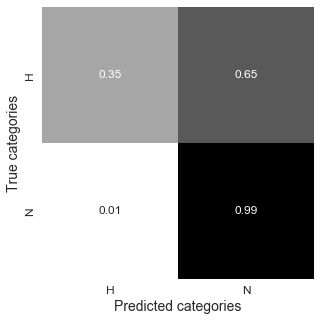

array([[ 26,  48],
       [  5, 464]])

In [30]:
print_cm(y_test, y_preds_lr , ['H','N'])

In [31]:
# Predictions with tfidf

lr_model_tfidf = linear_model.LogisticRegression(C=10, class_weight='balanced')

lr_model_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_preds_lr_tfidf = lr_model_tfidf.predict(X_test_tfidf)

print(classification_report( y_test_tfidf, y_preds_lr_tfidf ))

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.45      0.61      0.51        74
          1       0.93      0.88      0.91       469

avg / total       0.87      0.84      0.85       543



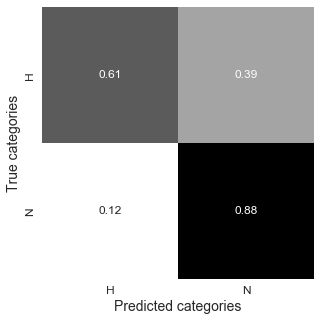

array([[ 45,  29],
       [ 56, 413]])

In [32]:
print_cm(y_test, y_preds_lr_tfidf , ['H','N'])

# Machine learning with parameter search

### As a metric, i will maximise recall for class "H" (it is better to predict an "H" which is actually an "N" than the contrary). The function custom_recall does this and will be used as evaluation metric to choose the best model 

In [33]:
from sklearn.metrics import f1_score, recall_score, make_scorer


def custom_recall(y_true, y_pred): 
    ''' Computes recall only on labels 0 '''
    rec = recall_score(y_true, y_pred, labels=[0], pos_label=0, average='binary')
    return rec #target_accuracy


my_scorer = make_scorer(custom_recall)


In [38]:

def my_pipeline(my_clf, x_train, x_test , y_train, t_test, scorer, parameters):

    pipeline = Pipeline([('clf', my_clf)])

    nn = x_train.shape[0]

    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring=scorer)
    grid_search.fit(x_train, y_train)
    print 'Best score: %0.3f' % grid_search.best_score_
    print 'Best parameters set:'
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print '\t%s: %r' % (param_name, best_parameters[param_name])

    predictions = grid_search.predict(x_test)
    print classification_report(y_test, predictions)
    
    return grid_search

In [39]:
parameters_lr = {
        'clf__penalty': ('l1', 'l2'),
        'clf__C': np.linspace(1, 1000, 5),
    }



class_LR = my_pipeline(linear_model.LogisticRegression(C=1., class_weight='balanced'), 
                       X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf,
                       my_scorer , parameters_lr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.4s finished


Best score: 0.575
Best parameters set:
	clf__C: 750.25
	clf__penalty: 'l1'
             precision    recall  f1-score   support

          0       0.37      0.59      0.45        74
          1       0.93      0.84      0.88       469

avg / total       0.85      0.80      0.82       543



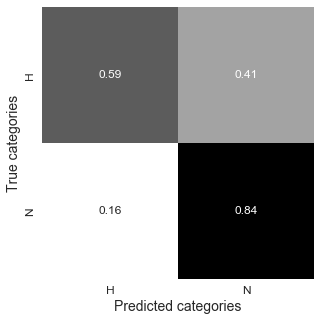

array([[ 44,  30],
       [ 76, 393]])

In [40]:
print_cm(y_test_tfidf, class_LR.predict(X_test_tfidf) , ['H','N'])

### SVM

In [41]:
scaler = preprocessing.StandardScaler().fit(X_train_tfidf)

X_train_scaled = scaler.transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

n_components = 50
pca = PCA(n_components=n_components, whiten=True).fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [42]:
# I use the pca components wit n=50, therwise it is too slow. But with the full features it's still worse than LogReg!

parameters_svm = {
        'clf__gamma': (0.0001, 0.001, 0.01),
        'clf__C': (100, 150, 500),
    }

class_SVM = my_pipeline(svm.SVC(C=100, kernel='rbf'),
                       X_train_pca, X_test_pca, y_train_tfidf, y_test_tfidf,
                       my_scorer , parameters_svm)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   12.7s finished


Best score: 0.427
Best parameters set:
	clf__C: 500
	clf__gamma: 0.01
             precision    recall  f1-score   support

          0       0.50      0.43      0.46        74
          1       0.91      0.93      0.92       469

avg / total       0.86      0.86      0.86       543



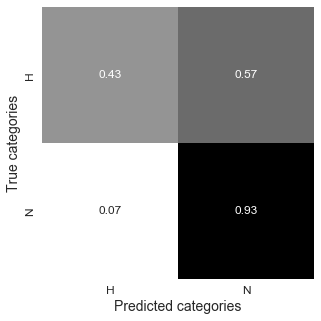

array([[ 32,  42],
       [ 32, 437]])

In [44]:
print_cm(y_test_tfidf, class_SVM.predict(X_test_pca) , ['H','N'])

### Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=321, verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.82      0.57      0.67        74
          1       0.93      0.98      0.96       469

avg / total       0.92      0.92      0.92       543



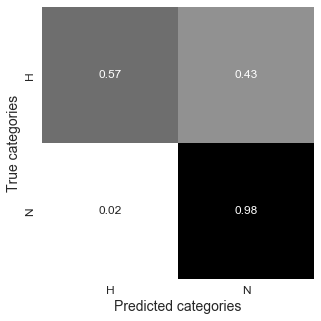

array([[ 42,  32],
       [  9, 460]])

In [45]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=321)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)


print classification_report(y_test, y_pred)
print_cm(y_test, y_pred , ['H','N'])

In [46]:
parameters_rf = {
        'clf__criterion': ('gini', 'entropy'),
#        'clf__max_depth': (None, 10, 100),
#        'clf__min_samples_leaf':(1,5,10)
    }

class_RF = my_pipeline(ensemble.RandomForestClassifier(n_jobs=-1, random_state=321),
                       X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf,
                       my_scorer, parameters_rf )

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.8s finished


Best score: 0.484
Best parameters set:
	clf__criterion: 'gini'
             precision    recall  f1-score   support

          0       0.82      0.57      0.67        74
          1       0.93      0.98      0.96       469

avg / total       0.92      0.92      0.92       543



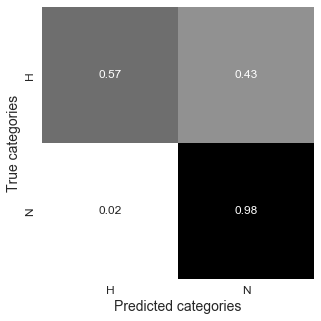

array([[ 42,  32],
       [  9, 460]])

In [47]:
print_cm(y_test_tfidf, class_RF.predict(X_test_tfidf) , ['H','N'])

# Best model

Best model is LogReg with weights = 'balanced' and C=10, using tfidf as features

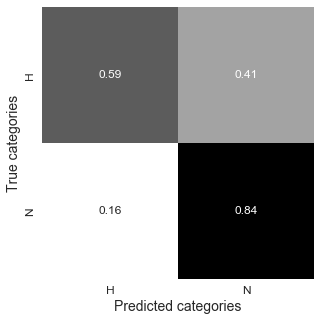

array([[ 44,  30],
       [ 76, 393]])

In [49]:
my_best = class_LR

my_best_pred = my_best.predict(X_test_tfidf)

print_cm(y_test, my_best_pred , ['H','N'])

# Find  misclassified tweets

In [50]:
tw_data.shape

(3615, 13)

In [51]:
df_y_pred_err = pd.DataFrame([y_test]).transpose()
df_y_pred_err['pred'] = my_best_pred

#df_y['pred'] = y_preds_lr
err_df = df_y_pred_err[df_y_pred_err['pred']!=df_y_pred_err['Label_id']]
indexes = err_df.index


df_wrong = pd.concat([tw_data.iloc[indexes,:],err_df.drop('Label_id', axis=1)], axis=1)

df_wrong.head(2)

,ID,Label,Texte,Texte_clean,nbr_characters,nbr_words,nbr_ats,nbr_hashtags,nbr_urls,nbr_letters,nbr_caps,nbr_fancy,Label_id,pred
1391,1006608740563464192,H,@RaptorDissident Ce minable veut s'en prendre ...,ce minable veut s en prendre a des animaux il ...,152,28,1,0,0,110,4,0,0,1
862,1006502682310397952,N,"@GG_RMC @BreizhManouchka Non, parce qu'il repa...",non parce qu il repartira en chercher d autres...,87,11,2,0,0,69,8,0,1,0


In [52]:
# Reminder: categories. The problem is when Predicted=1 and Actual=0
label_to_id_fr

{'H': 0, 'N': 1}

In [53]:
for index,row in df_wrong.iterrows():
    if (row['pred']==1) and (row['Label_id']==0):
        print(row['Texte'])
        print(row['Texte_clean'])
        print('')
        print('Predicted: %s , Actual: %s \n' %( 'N', 'H'))
        print('\n')

@RaptorDissident Ce minable veut s'en prendre à des animaux, il n'a même pas un soupçon de courage. Il mérite de loin un coup de slash dans la tête
ce minable veut s en prendre a des animaux il n a meme pas un soupcon de courage il merite de loin un coup de slash dans la tete

Predicted: N , Actual: H 



@DNadjar @JacobCohen44 Tous au service de Netanyahu! Même les non juifs sont devenus sionistes. L’information est entre les mains du Mossad?
tous au service de netanyahu meme les non juifs sont devenus sionistes l information est entre les mains du mossad

Predicted: N , Actual: H 



Emeute chinoise à Paris. Voitures brûlées, attaque de commissariat … La sino-racaille est égale à la racaille africano-arabe. Immigration stop!
emeute chinoise a paris voitures brulees attaque de commissariat la sino racaille est egale a la racaille africano arabe immigration stop

Predicted: N , Actual: H 



@MLP_officiel EH MARINE ! TAGEUL !
eh marine tageul

Predicted: N , Actual: H 



@Hammoud33308

#  Visualise 2-dim PCA (inutile)

In [54]:
from sklearn.decomposition import PCA, RandomizedPCA

n_components = 2
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape
y_train.shape

(3072, 2)

(3072,)

In [55]:
tw_data_pca = pd.DataFrame(data=np.append(X_train_pca, y_train.reshape(y_train.shape[0],1), axis=1), columns=['P1','P2','Label'])

tw_data_pca.head(5)

,P1,P2,Label
0,-0.587790,0.059748,0.0
1,0.926788,-0.316161,0.0
2,1.392572,-0.435432,1.0
3,1.446928,-0.824411,1.0
4,-1.249442,-0.324263,1.0


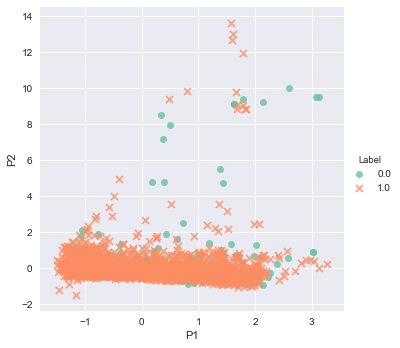

In [56]:

sns.lmplot(x="P1", y="P2", data=tw_data_pca, fit_reg=False, hue='Label', legend=True, markers=["o", "x"], palette="Set2")

